# <span style="font-family:cursive;text-align:center">⬇️ Import Libraries</span>

In [57]:
import pandas as pd;
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
import missingno as msno;
from sklearn.model_selection import train_test_split
import plotly.express as px
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from mlxtend.evaluate import mcnemar_table,mcnemar_tables
from mlxtend.plotting import checkerboard_plot
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [58]:
RTA=df = pd.read_csv("C:\TMLC\PROJECT 1\Dataset\RTA.csv")

In [59]:
RTA.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [60]:
RTA._get_numeric_data()

,Number_of_vehicles_involved,Number_of_casualties
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
12311,2,1
12312,2,1
12313,1,1
12314,2,1


In [61]:
RTA.tail(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [62]:
RTA.sample(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11877,16:13:00,Wednesday,Under 18,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Other,Unknown,...,Reversing,Driver or rider,Male,5,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
11577,11:30:00,Tuesday,Under 18,Male,High school,Owner,Above 10yr,Long lorry,Organization,Unknown,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury


In [63]:
RTA.shape

(12316, 32)

In [64]:
RTA.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# <span style="font-family:cursive;text-align:center">📊 Exploratory Data Analysis</span>

In [65]:
RTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [66]:
RTA.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

array([[<Axes: title={'center': 'Number_of_vehicles_involved'}>,
        <Axes: title={'center': 'Number_of_casualties'}>]], dtype=object)

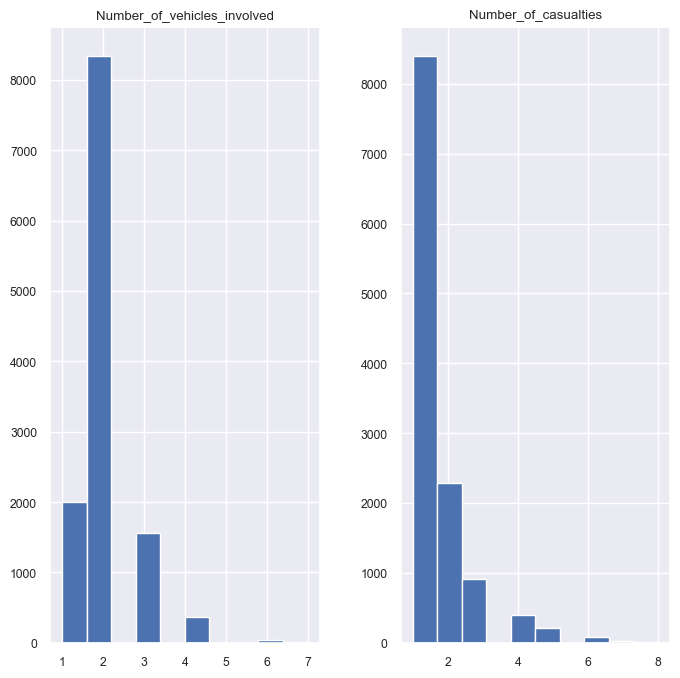

In [67]:
RTA.hist(figsize=(8, 8))

In [68]:
RTA.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [69]:
RTA.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [70]:
#ANAlysis of categorical data

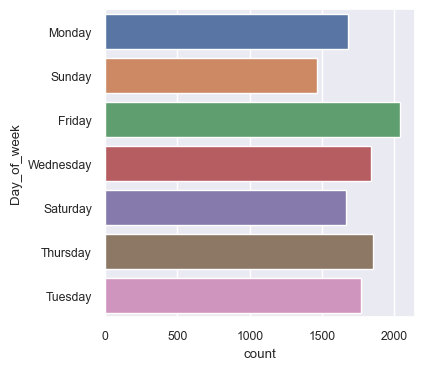

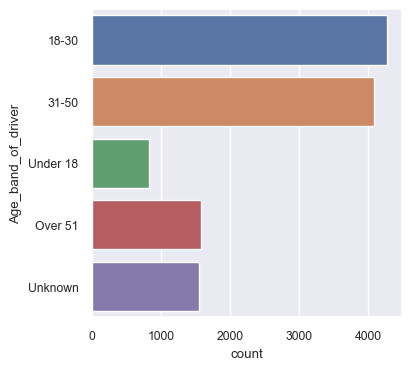

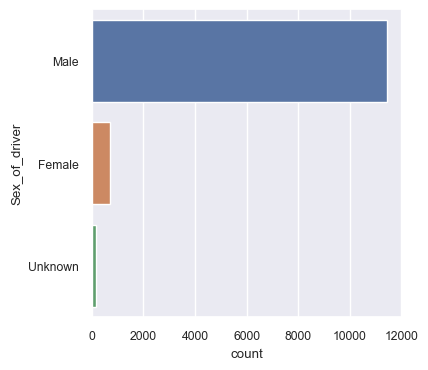

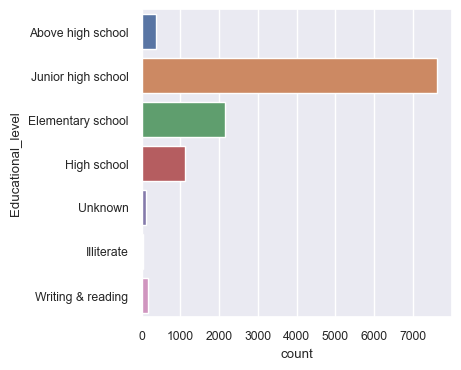

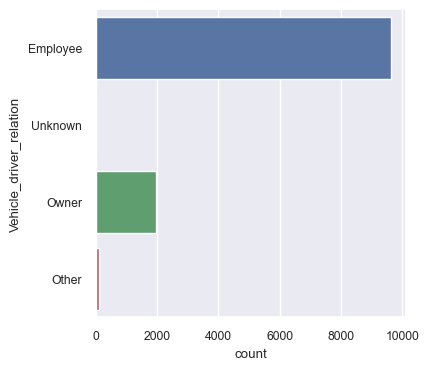

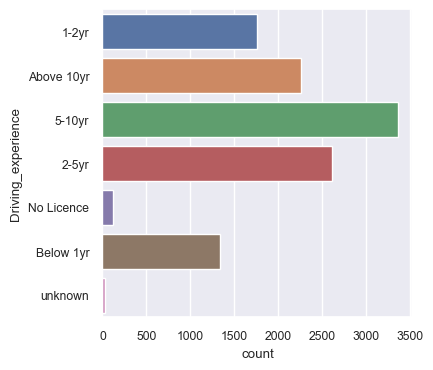

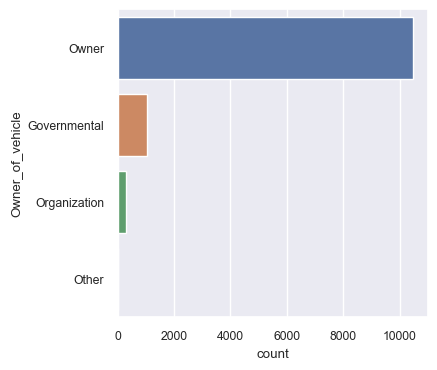

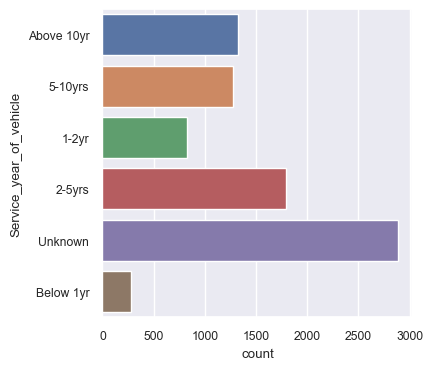

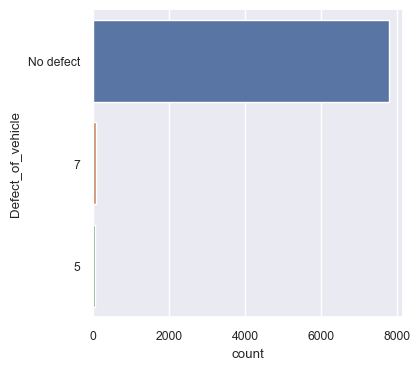

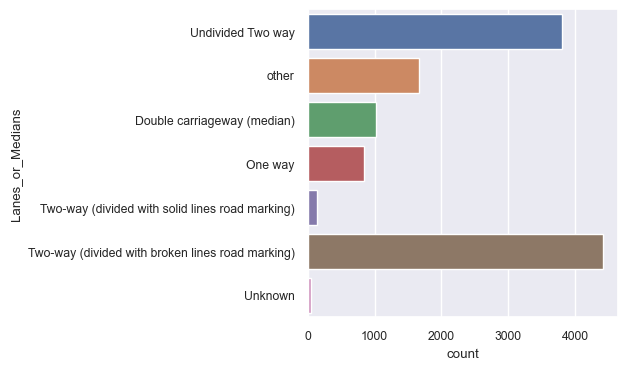

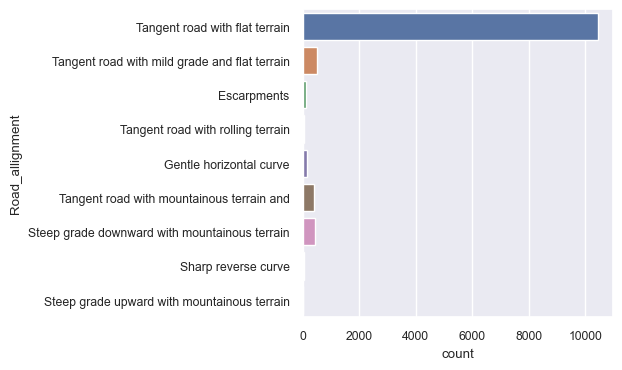

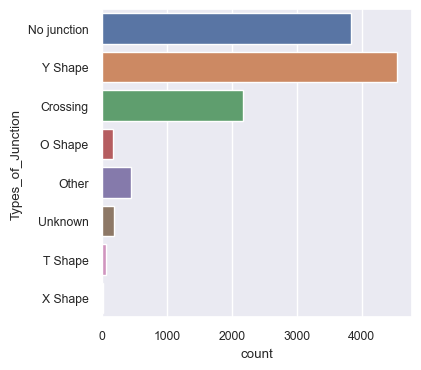

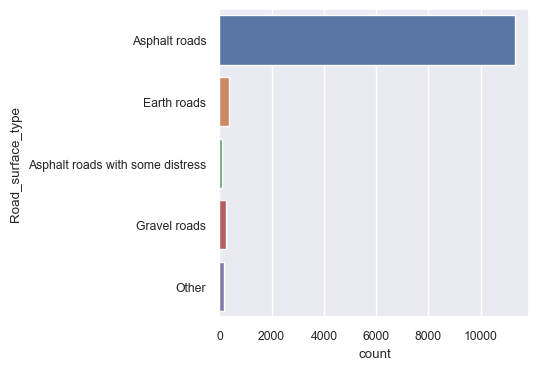

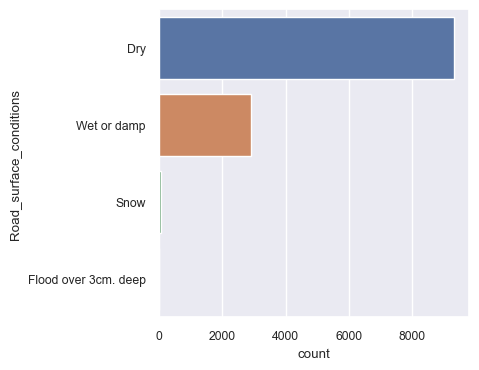

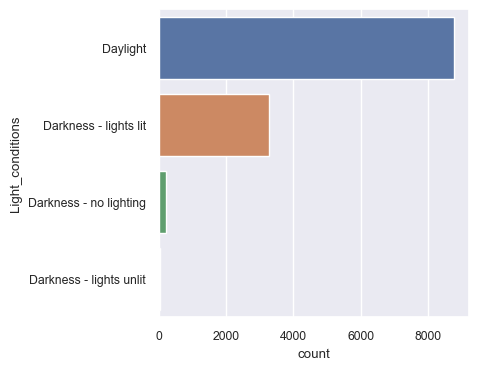

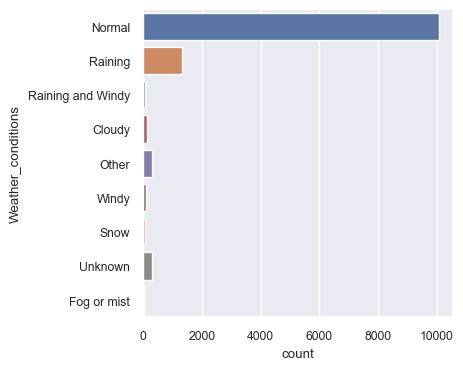

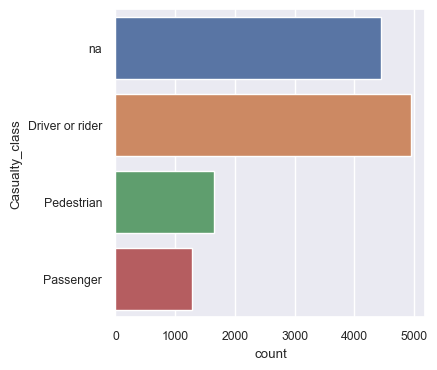

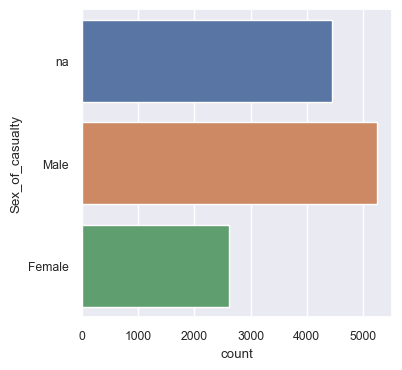

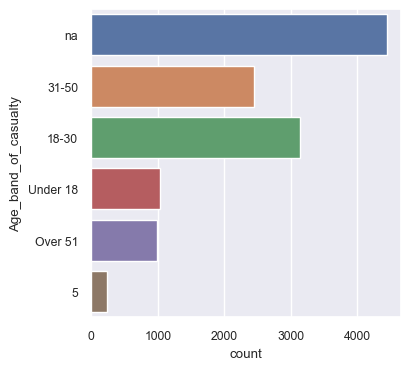

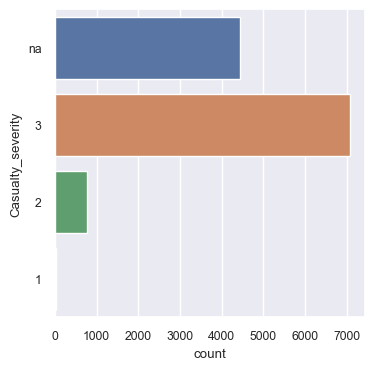

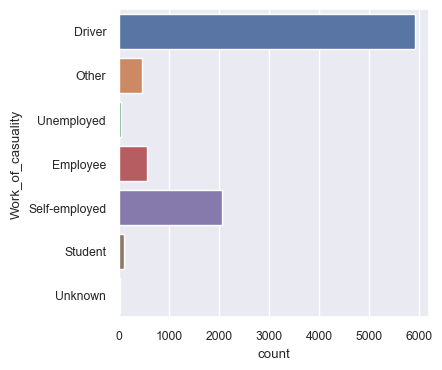

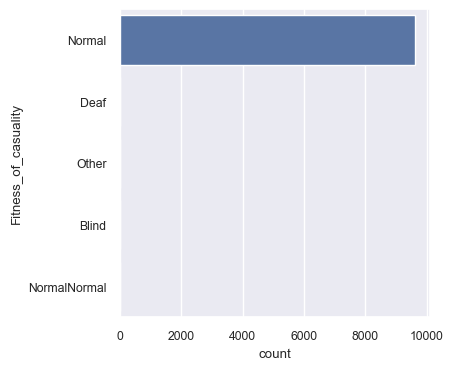

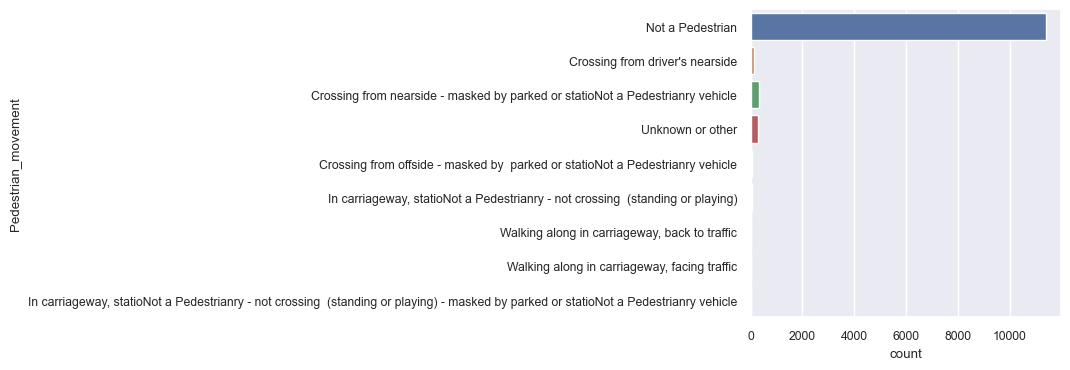

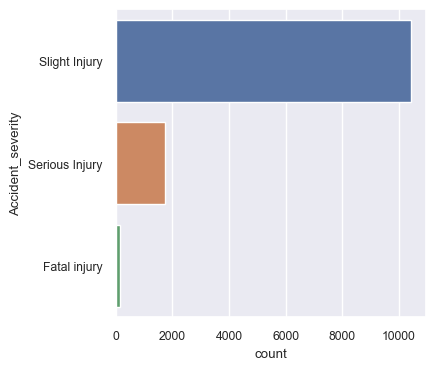

In [71]:
for col in RTA.select_dtypes(include='object'):
    if(RTA[col].nunique() < 10):
        plt.figure(figsize=(4, 4))
        sns.countplot(y=col, data=RTA)
        plt.show()

In [72]:
#Observing the relationship between categorical data and numerical data
#look for which category is most affected by the numerical data

<Axes: xlabel='Number_of_casualties', ylabel='Accident_severity'>

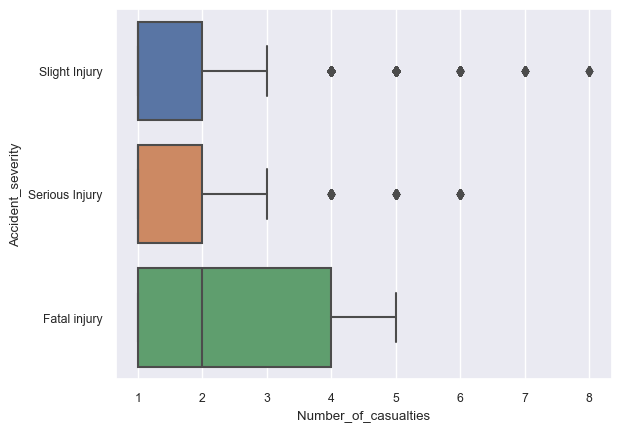

In [73]:
sns.boxplot(y=RTA['Accident_severity'], x=RTA['Number_of_casualties'])
#fatal injury most affected

<Axes: xlabel='Number_of_vehicles_involved', ylabel='Accident_severity'>

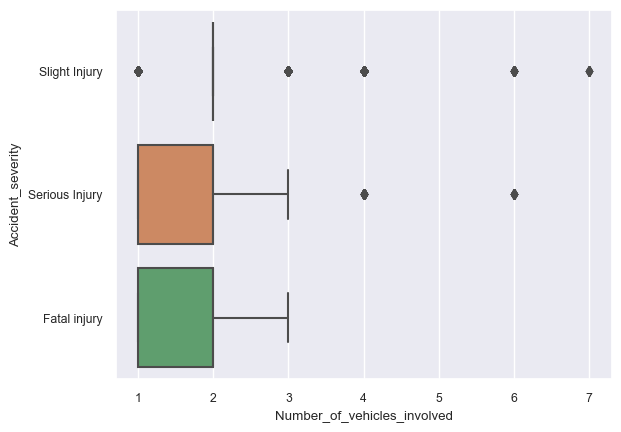

In [74]:
sns.boxplot(y=RTA['Accident_severity'], x=RTA['Number_of_vehicles_involved'])

In [75]:
RTA.isna().sum()   #checking for missing values

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [76]:
for i in RTA.columns:
    print(f"unique values in {i} are:")
    print(RTA[i].nunique(), '\n')

unique values in Time are:
1074 

unique values in Day_of_week are:
7 

unique values in Age_band_of_driver are:
5 

unique values in Sex_of_driver are:
3 

unique values in Educational_level are:
7 

unique values in Vehicle_driver_relation are:
4 

unique values in Driving_experience are:
7 

unique values in Type_of_vehicle are:
17 

unique values in Owner_of_vehicle are:
4 

unique values in Service_year_of_vehicle are:
6 

unique values in Defect_of_vehicle are:
3 

unique values in Area_accident_occured are:
14 

unique values in Lanes_or_Medians are:
7 

unique values in Road_allignment are:
9 

unique values in Types_of_Junction are:
8 

unique values in Road_surface_type are:
5 

unique values in Road_surface_conditions are:
4 

unique values in Light_conditions are:
4 

unique values in Weather_conditions are:
9 

unique values in Type_of_collision are:
10 

unique values in Number_of_vehicles_involved are:
6 

unique values in Number_of_casualties are:
8 

unique values in V

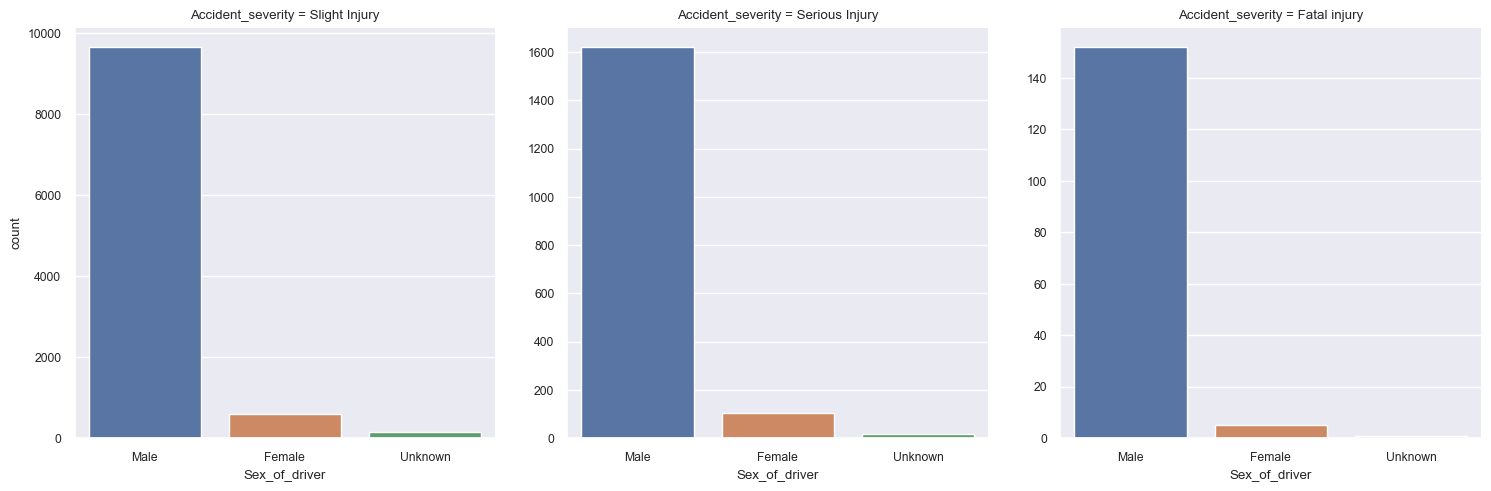

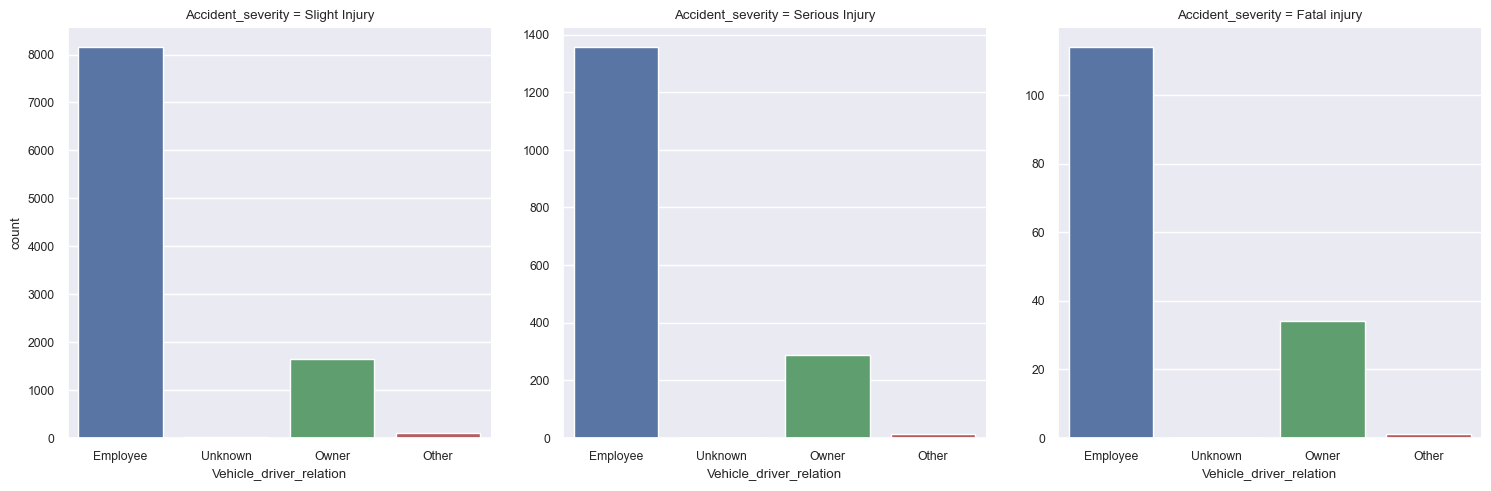

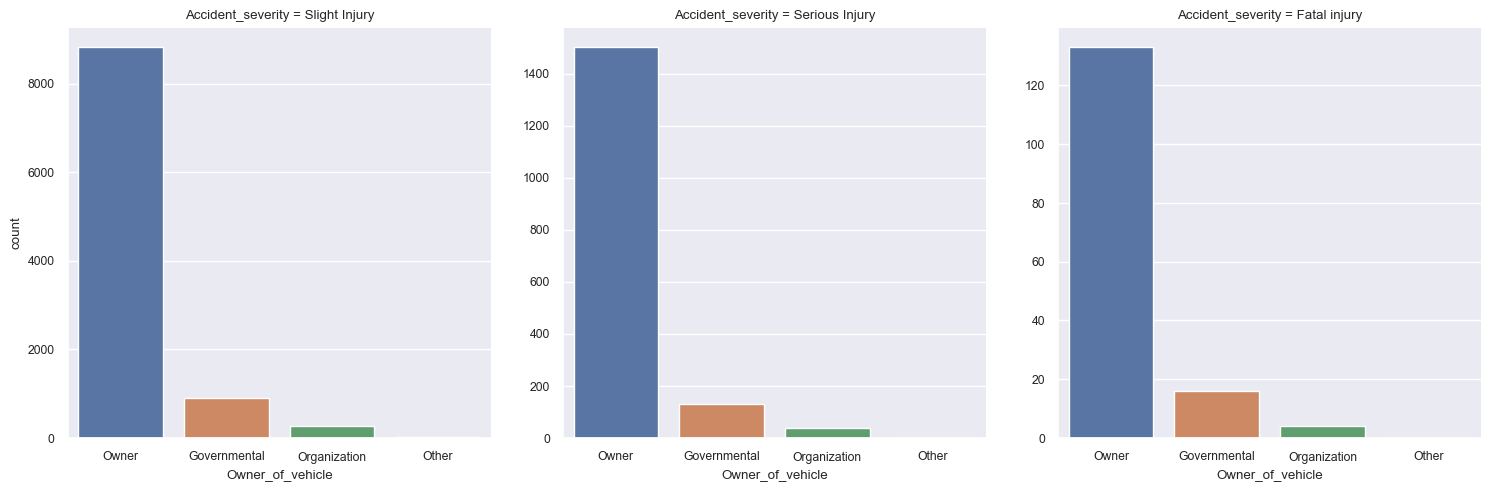

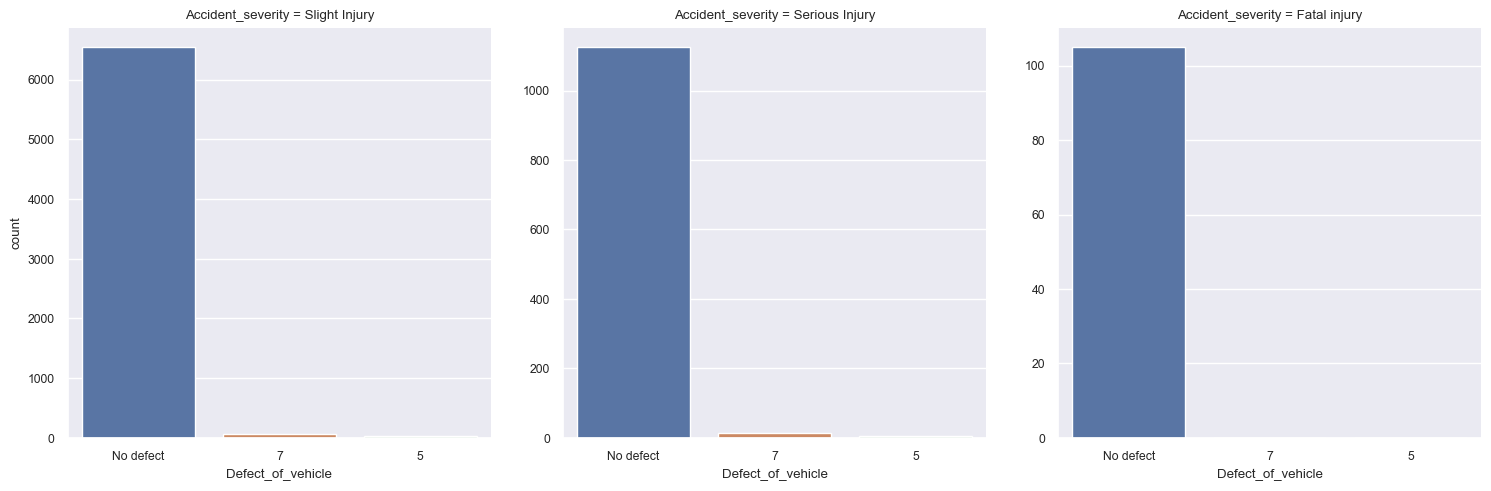

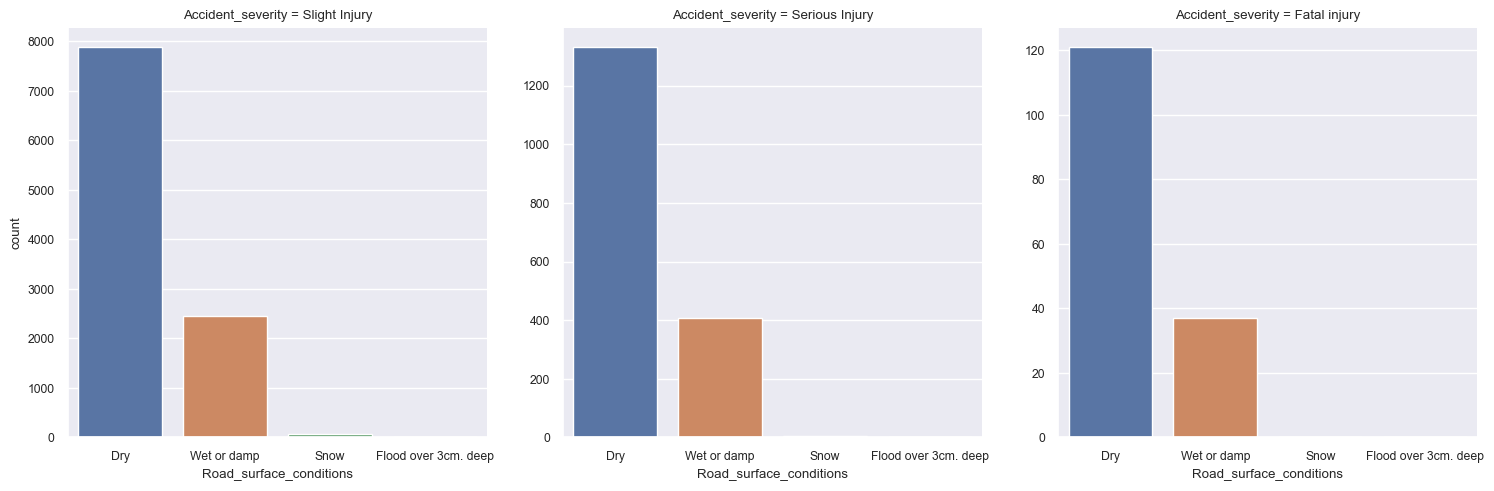

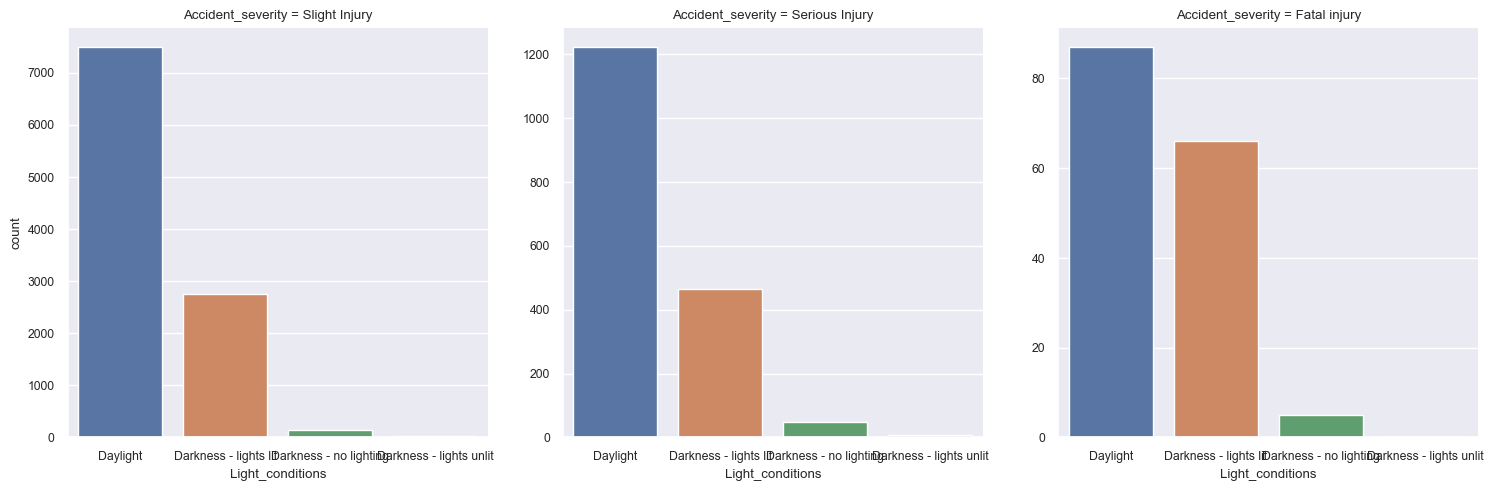

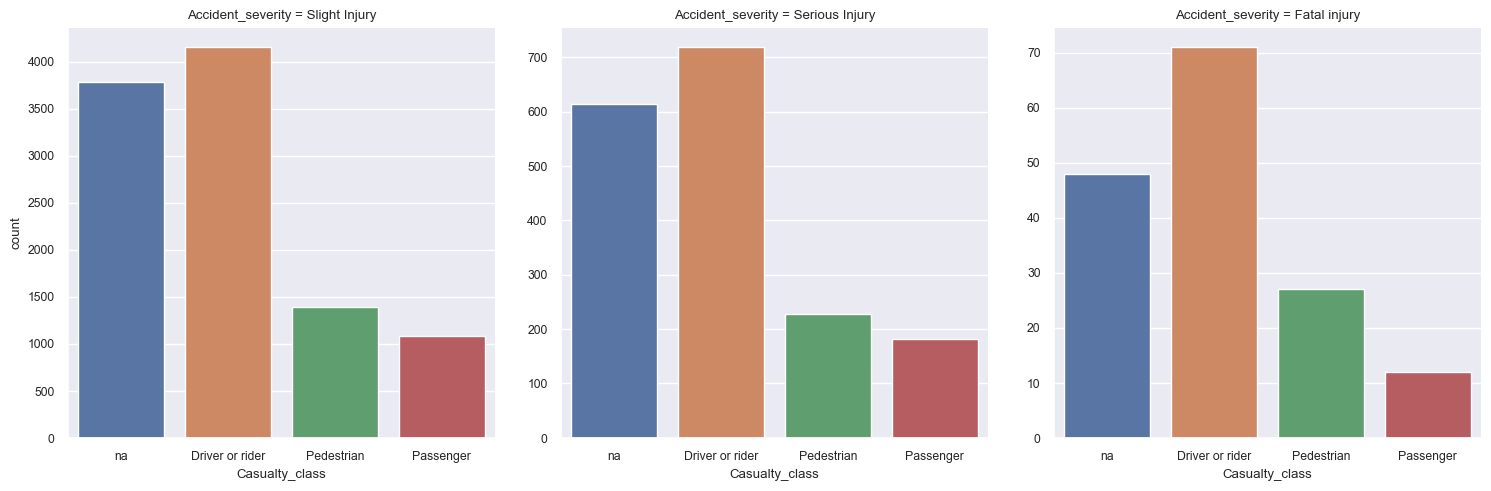

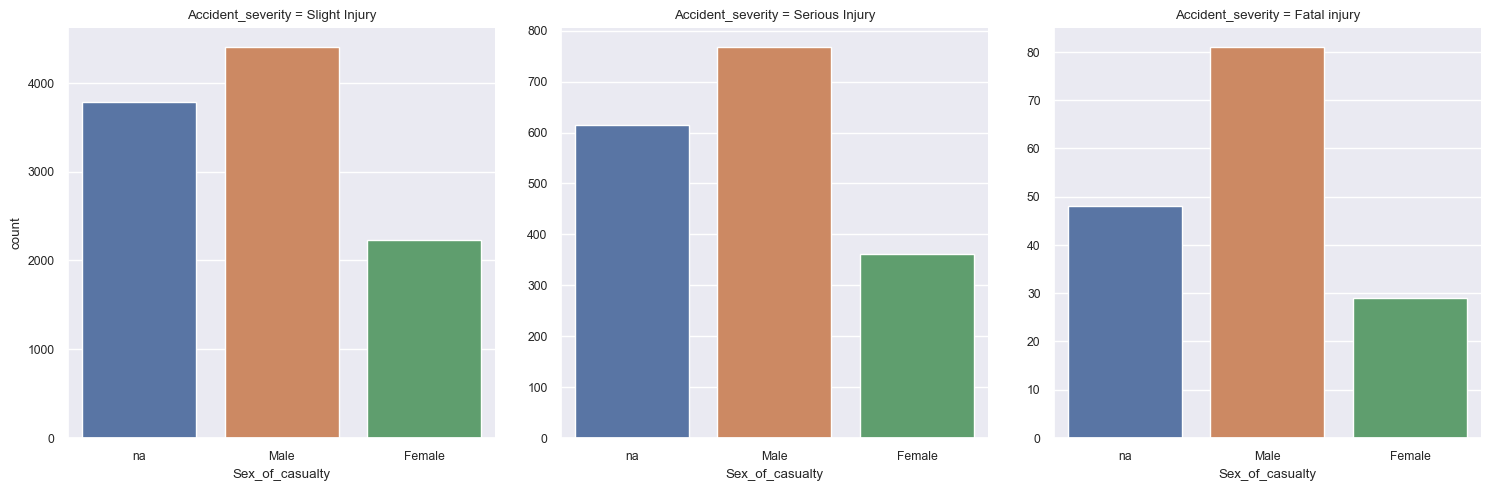

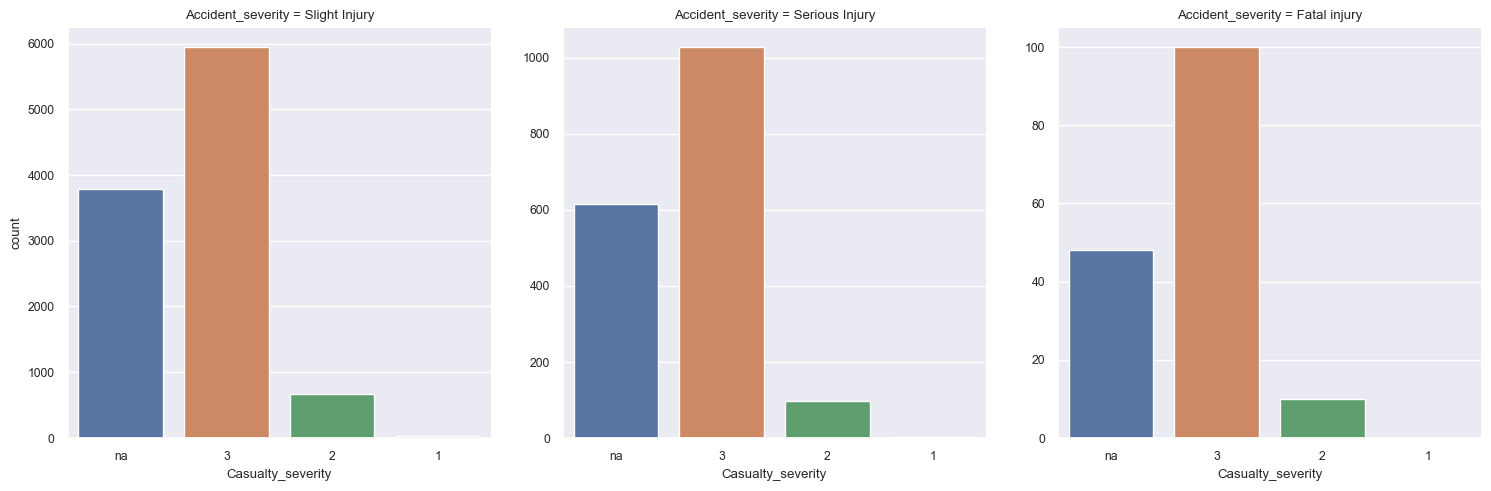

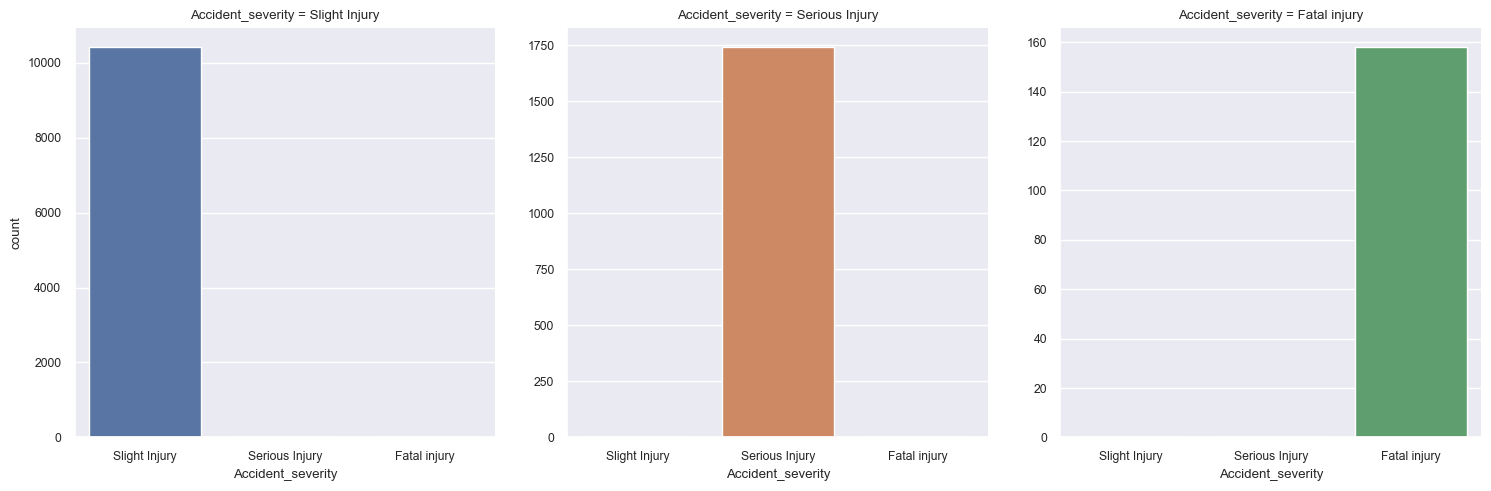

In [77]:
for col in RTA.select_dtypes(include='object'):
    if(RTA[col].nunique() <= 4):
        g=sns.catplot(x=col, kind='count', col='Accident_severity', data=RTA, sharey=False)

In [78]:
#finding out correlation
#It depicts the strength of the relationship between two variables(only for numeric).
selected_columns=['Number_of_casualties', 'Number_of_vehicles_involved']
corr=RTA[selected_columns].corr()
print(corr)

                             Number_of_casualties  Number_of_vehicles_involved
Number_of_casualties                     1.000000                     0.213427
Number_of_vehicles_involved              0.213427                     1.000000


<Axes: >

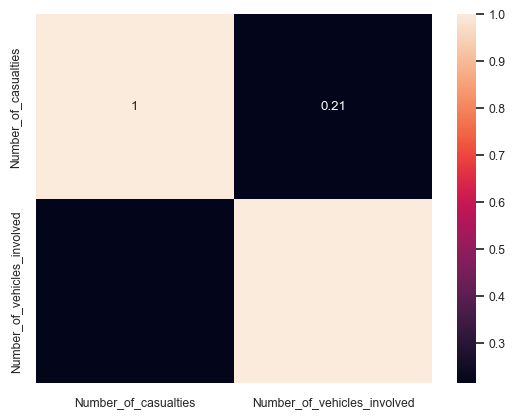

In [79]:
sns.heatmap(corr, annot=True)

In [80]:
fig=px.treemap(RTA, path=['Cause_of_accident'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

--------------------DATA PRE-PROCESSING STARTS---------------------

<Axes: >

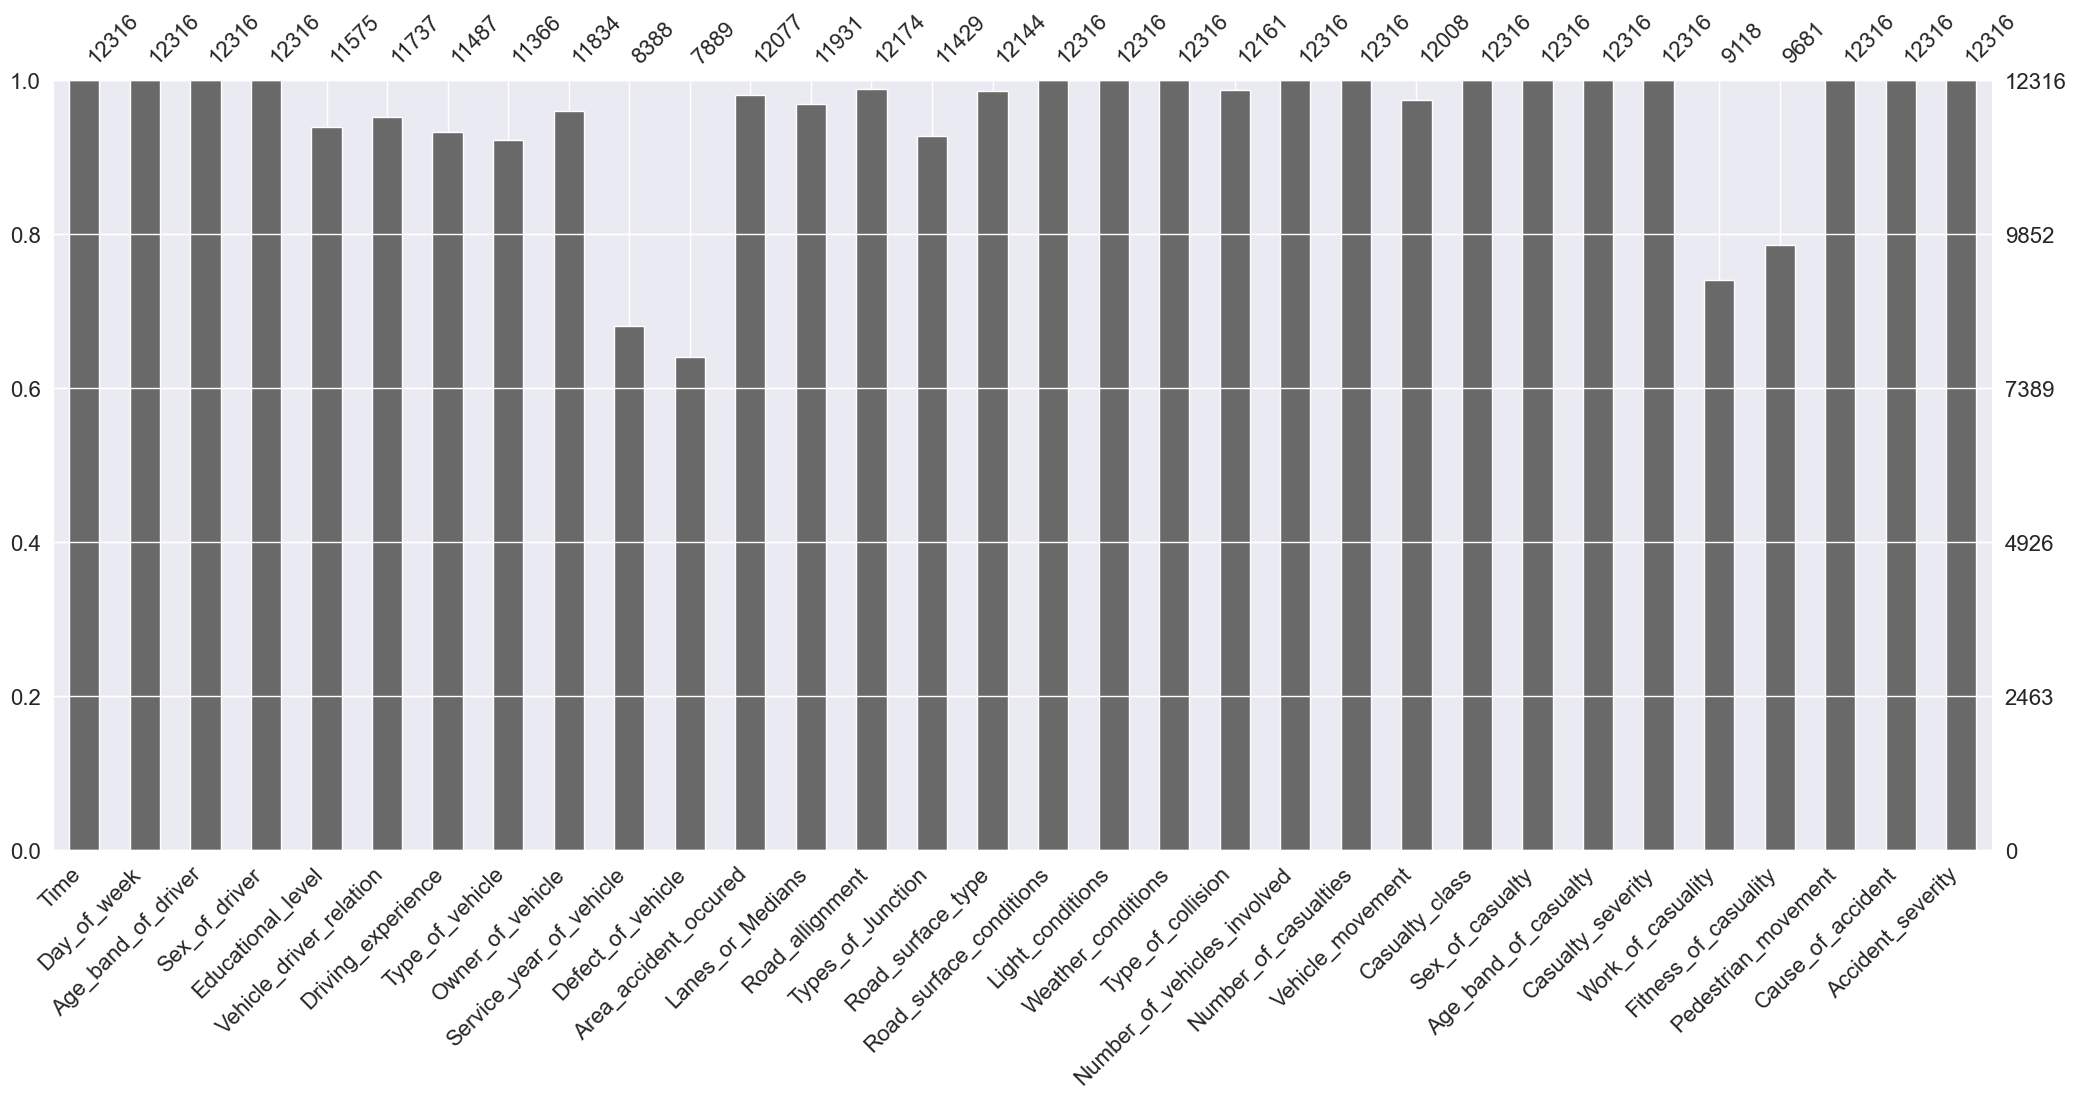

In [81]:
msno.bar(RTA)

<Axes: >

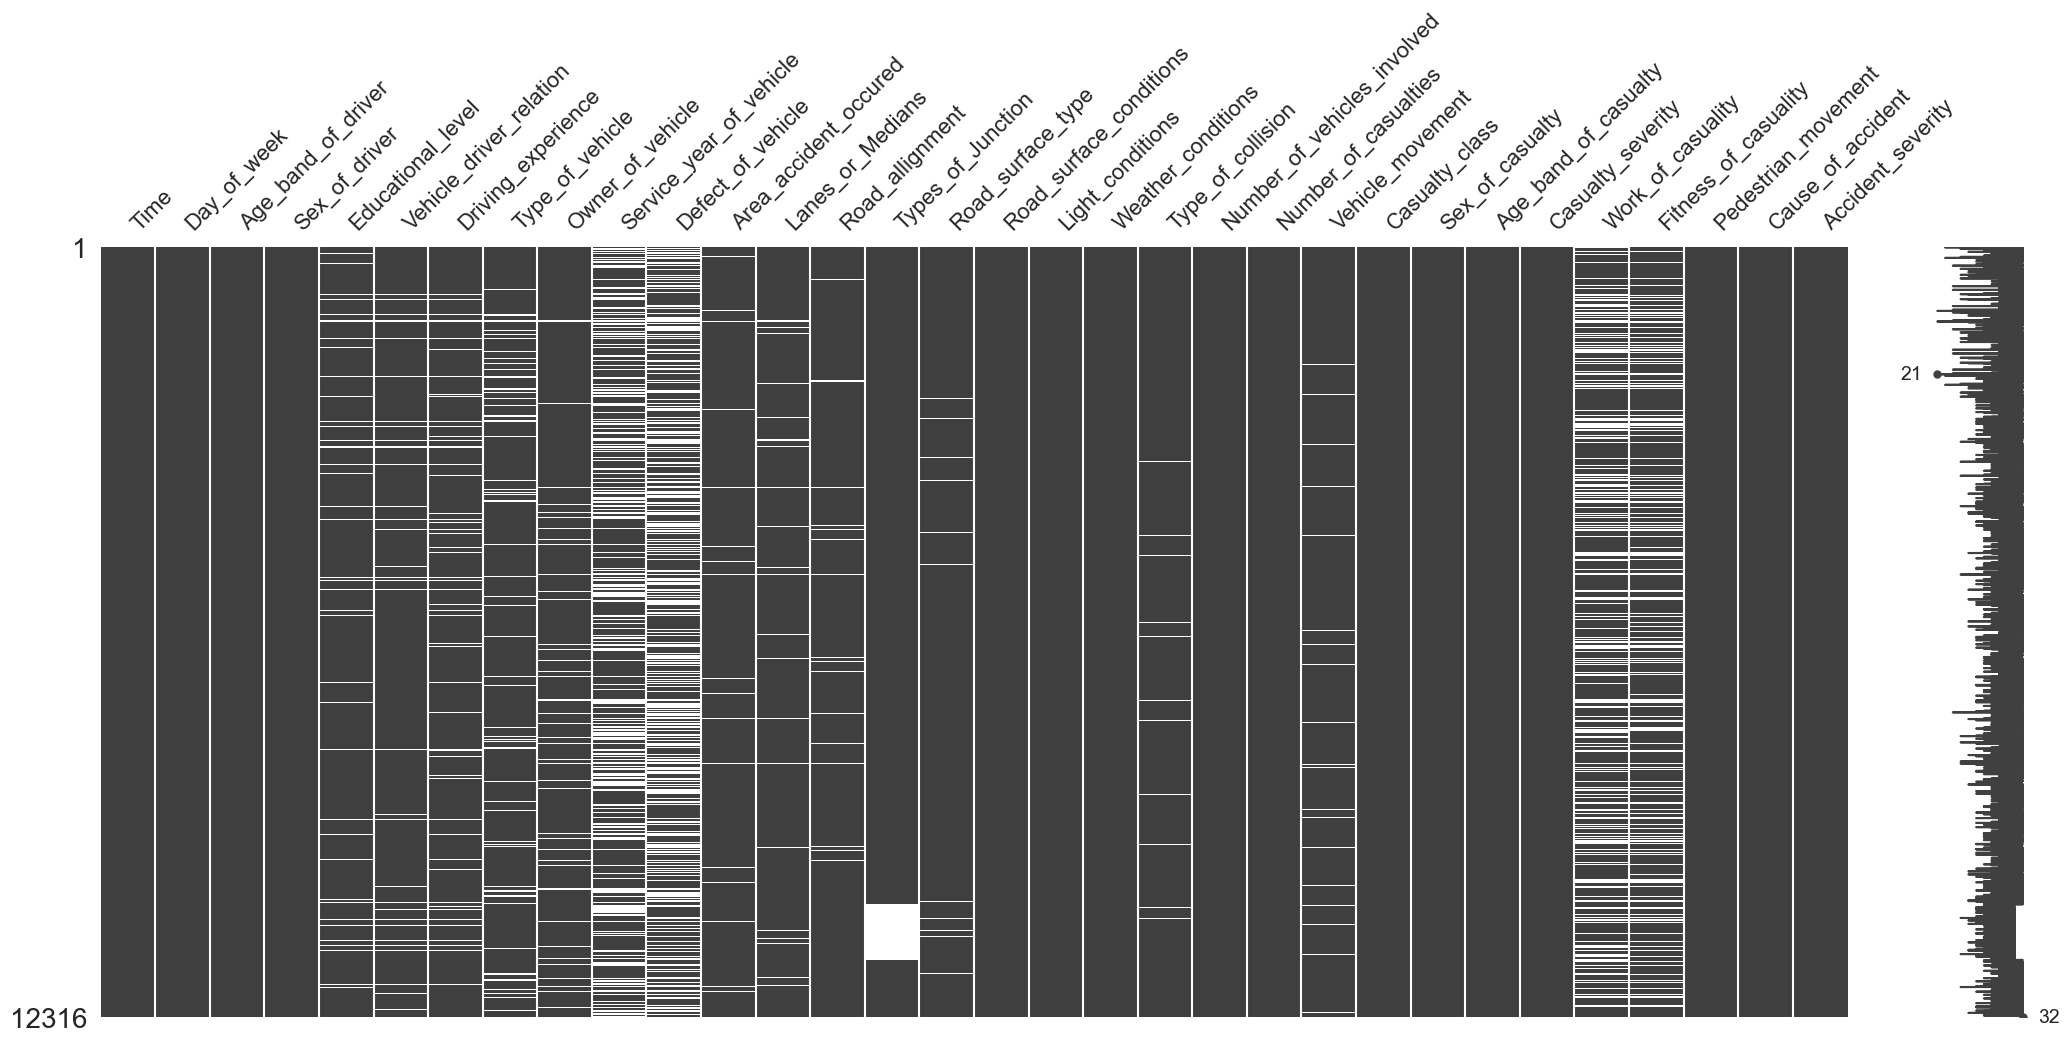

In [82]:
msno.matrix(RTA)

In [83]:
RTA.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [84]:
RTA.drop(columns=['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [85]:
RTA['Time']=pd.to_datetime(RTA['Time'])

RTA["Time"].dt.hour

# extracting hour and minute from timestamp
RTA['hour'] = RTA['Time'].dt.hour
RTA['minute'] = RTA['Time'].dt.minute
RTA.drop('Time', axis=1, inplace=True)

C:\Users\shrir\AppData\Local\Temp\ipykernel_10380\1285330736.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [86]:
RTA.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,NaN,...,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,Undivided Two way,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,NaN,Recreational areas,other,...,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,NaN,Office areas,other,...,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,2-5yr,NaN,Owner,5-10yrs,Industrial areas,other,...,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury,1,6


In [87]:
p=RTA['Age_band_of_casualty'].unique()
p

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

In [88]:
impute_col=[x for x in RTA.isna().sum()[RTA.isna().sum()!=0].index.tolist()]
for col in impute_col:
    mode=RTA[col].mode()[0]
    RTA[col].fillna(mode, inplace=True)

C:\Users\shrir\AppData\Local\Temp\ipykernel_10380\1853206617.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [89]:
RTA.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

-------------------------ENCODING STARTS------------------------------

In [90]:
#here we are converting categorical variables to numerical values

In [91]:
def ordinal_encoding(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

df = ordinal_encoding(df, df.drop(['Accident_severity'], axis=1).columns)
df.shape                                     

(12316, 29)

In [92]:
RTA.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,...,2,3,2,5,3,5,16,Slight Injury,1,6


HYPOTHESIS ESTABLISHMENT

In [93]:
hypothesis_data=RTA.copy(deep=True) #copying the original data before performing hypothesis

In [94]:
hypothesis_data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,...,2,3,2,5,3,5,16,Slight Injury,1,6


In [95]:
((hypothesis_data.groupby(['Sex_of_driver']).size() / hypothesis_data["Sex_of_driver"].count()) * 100).add_prefix('Accidents(in %) Caused by ')   

Sex_of_driver
Accidents(in %) Caused by 0     5.691783
Accidents(in %) Caused by 1    92.862943
Accidents(in %) Caused by 2     1.445274
dtype: float64

In [96]:
fig=px.treemap(hypothesis_data, path=['Cause_of_accident'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [97]:
hypothesis_data.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,...,2,3,2,5,3,5,16,Slight Injury,1,6


In [98]:
ff = pd.crosstab(index=hypothesis_data['Sex_of_driver'].loc[hypothesis_data['Sex_of_driver'] !="Unknown"], columns=df['Accident_severity']
                 , margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Sex_of_driver,,,,
0,5,104,592,701
1,152,1621,9664,11437
2,1,18,159,178
All,158,1743,10415,12316


In [99]:
print("P(Gender = Female | Severity = Fatal) = " + str((ff.iloc[0,0])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Fatal) = " + str((ff.iloc[1,0])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Serious Injury) = " + str((ff.iloc[0,1])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Serious Injury) = " + str((ff.iloc[1,1])/(ff.iloc[1,3]*1.0)*100) + '%\n')

print("P(Gender = Female | Severity = Slight Injury) = " + str((ff.iloc[0,2])/(ff.iloc[0,3]*1.0)*100) + '%')
print("P(Gender = Male | Severity = Slight Injury) = " + str((ff.iloc[1,2])/(ff.iloc[1,3]*1.0)*100) + '%')

P(Gender = Female | Severity = Fatal) = 0.7132667617689016%
P(Gender = Male | Severity = Fatal) = 1.3290198478622017%

P(Gender = Female | Severity = Serious Injury) = 14.835948644793154%
P(Gender = Male | Severity = Serious Injury) = 14.173297193319925%

P(Gender = Female | Severity = Slight Injury) = 84.45078459343794%
P(Gender = Male | Severity = Slight Injury) = 84.49768295881788%


We cannot conclude anything on the basis of gender

In [100]:
#hypothesis on thje basis of speeding

ff = pd.crosstab(index=hypothesis_data['Cause_of_accident'], columns=hypothesis_data['Accident_severity'], margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Cause_of_accident,,,,
0,16,206,1251,1473
1,23,260,1525,1808
2,2,31,141,174
3,22,209,1171,1402
4,4,53,227,284
5,5,46,289,340
6,0,3,24,27
7,3,29,165,197
8,1,2,22,25


In [101]:
print(f'Injuries(all types due to speeding): {(ff.iloc[2,0] + ff.iloc[2,1] + ff.iloc[2,2] + ff.iloc[-6,0] + ff.iloc[-6,1] + ff.iloc[-6,2])}/{ff.iloc[-1,-1]}')
print(f'In percentage: {((ff.iloc[2,0] + ff.iloc[2,1] + ff.iloc[2,2] + ff.iloc[-6,0] + ff.iloc[-6,1] + ff.iloc[-6,2])/ff.iloc[-1,-1])*100} %')

Injuries(all types due to speeding): 235/12316
In percentage: 1.908087041247158 %


CHECKING IF WEEKENDS CAUSE MORE ACCIDENTS

In [102]:
ff = pd.crosstab(index=hypothesis_data['Day_of_week'], columns=hypothesis_data['Accident_severity'], margins=True)
pd.crosstab(index=hypothesis_data['Day_of_week'], columns=hypothesis_data['Accident_severity'], margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Day_of_week,,,,
0,16,313,1712,2041
1,12,204,1465,1681
2,37,245,1384,1666
3,35,190,1242,1467
4,22,272,1557,1851
5,17,257,1496,1770
6,19,262,1559,1840
All,158,1743,10415,12316


In [103]:
print('Accident percentage on weekdays:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] not in [2,3]])/ff.iloc[7,3],2))
print('Accident percentage on weekends:',round(sum([ff.iloc[i,3] for i in range(0,7) if ff.index[i] in [2,3]])/ff.iloc[7,3],2))

Accident percentage on weekdays: 0.75
Accident percentage on weekends: 0.25


CHECKING FOR ACCIDENTS AT NIGHT

In [104]:
ff = pd.crosstab(index=hypothesis_data['Light_conditions'], columns=hypothesis_data['Accident_severity'], margins=True)
pd.crosstab(index=hypothesis_data['Light_conditions'], columns=hypothesis_data['Accident_severity'], margins=True)
ff

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Light_conditions,,,,
0,66,465,2755,3286
1,0,7,33,40
2,5,49,138,192
3,87,1222,7489,8798
All,158,1743,10415,12316


In [105]:
sol = 0
for i in [0,1]:
    for j in [0,1,2]:
        sol += ff.iloc[j,i]

r = sol/(sum(ff.iloc[i,3] for i in [0,1,2]))
print('Dangerous injuries at night:',round(r,2),'%')
r = sum(ff.iloc[i,2] for i in [0,1,2])/sum(ff.iloc[i,3] for i in [0,1,2])
print('Slight injuries at night:',round(r,2),'%')

Dangerous injuries at night: 0.17 %
Slight injuries at night: 0.83 %


In [106]:
r = sum(ff.iloc[3,i] for i in [0,1])/ff.iloc[3,3]
print('Dangerous injuries at day:',round(r,2),'%')
r = ff.iloc[3,2]/ff.iloc[3,3]
print('Slight injuries at day:',round(r,2),'%')

Dangerous injuries at day: 0.15 %
Slight injuries at day: 0.85 %


In [107]:
ff = pd.crosstab(index=hypothesis_data['Weather_conditions'], columns=hypothesis_data['Accident_severity'], margins=True)
pd.crosstab(index=hypothesis_data['Weather_conditions'], columns=hypothesis_data['Accident_severity'], margins=True)
ff.drop([2,'All'],axis=0)

Accident_severity,Fatal injury,Serious Injury,Slight Injury,All
Weather_conditions,,,,
0,0,8,117,125
1,0,1,9,10
3,0,28,268,296
4,23,158,1150,1331
5,0,2,38,40
6,0,5,56,61
7,0,51,241,292
8,0,16,82,98


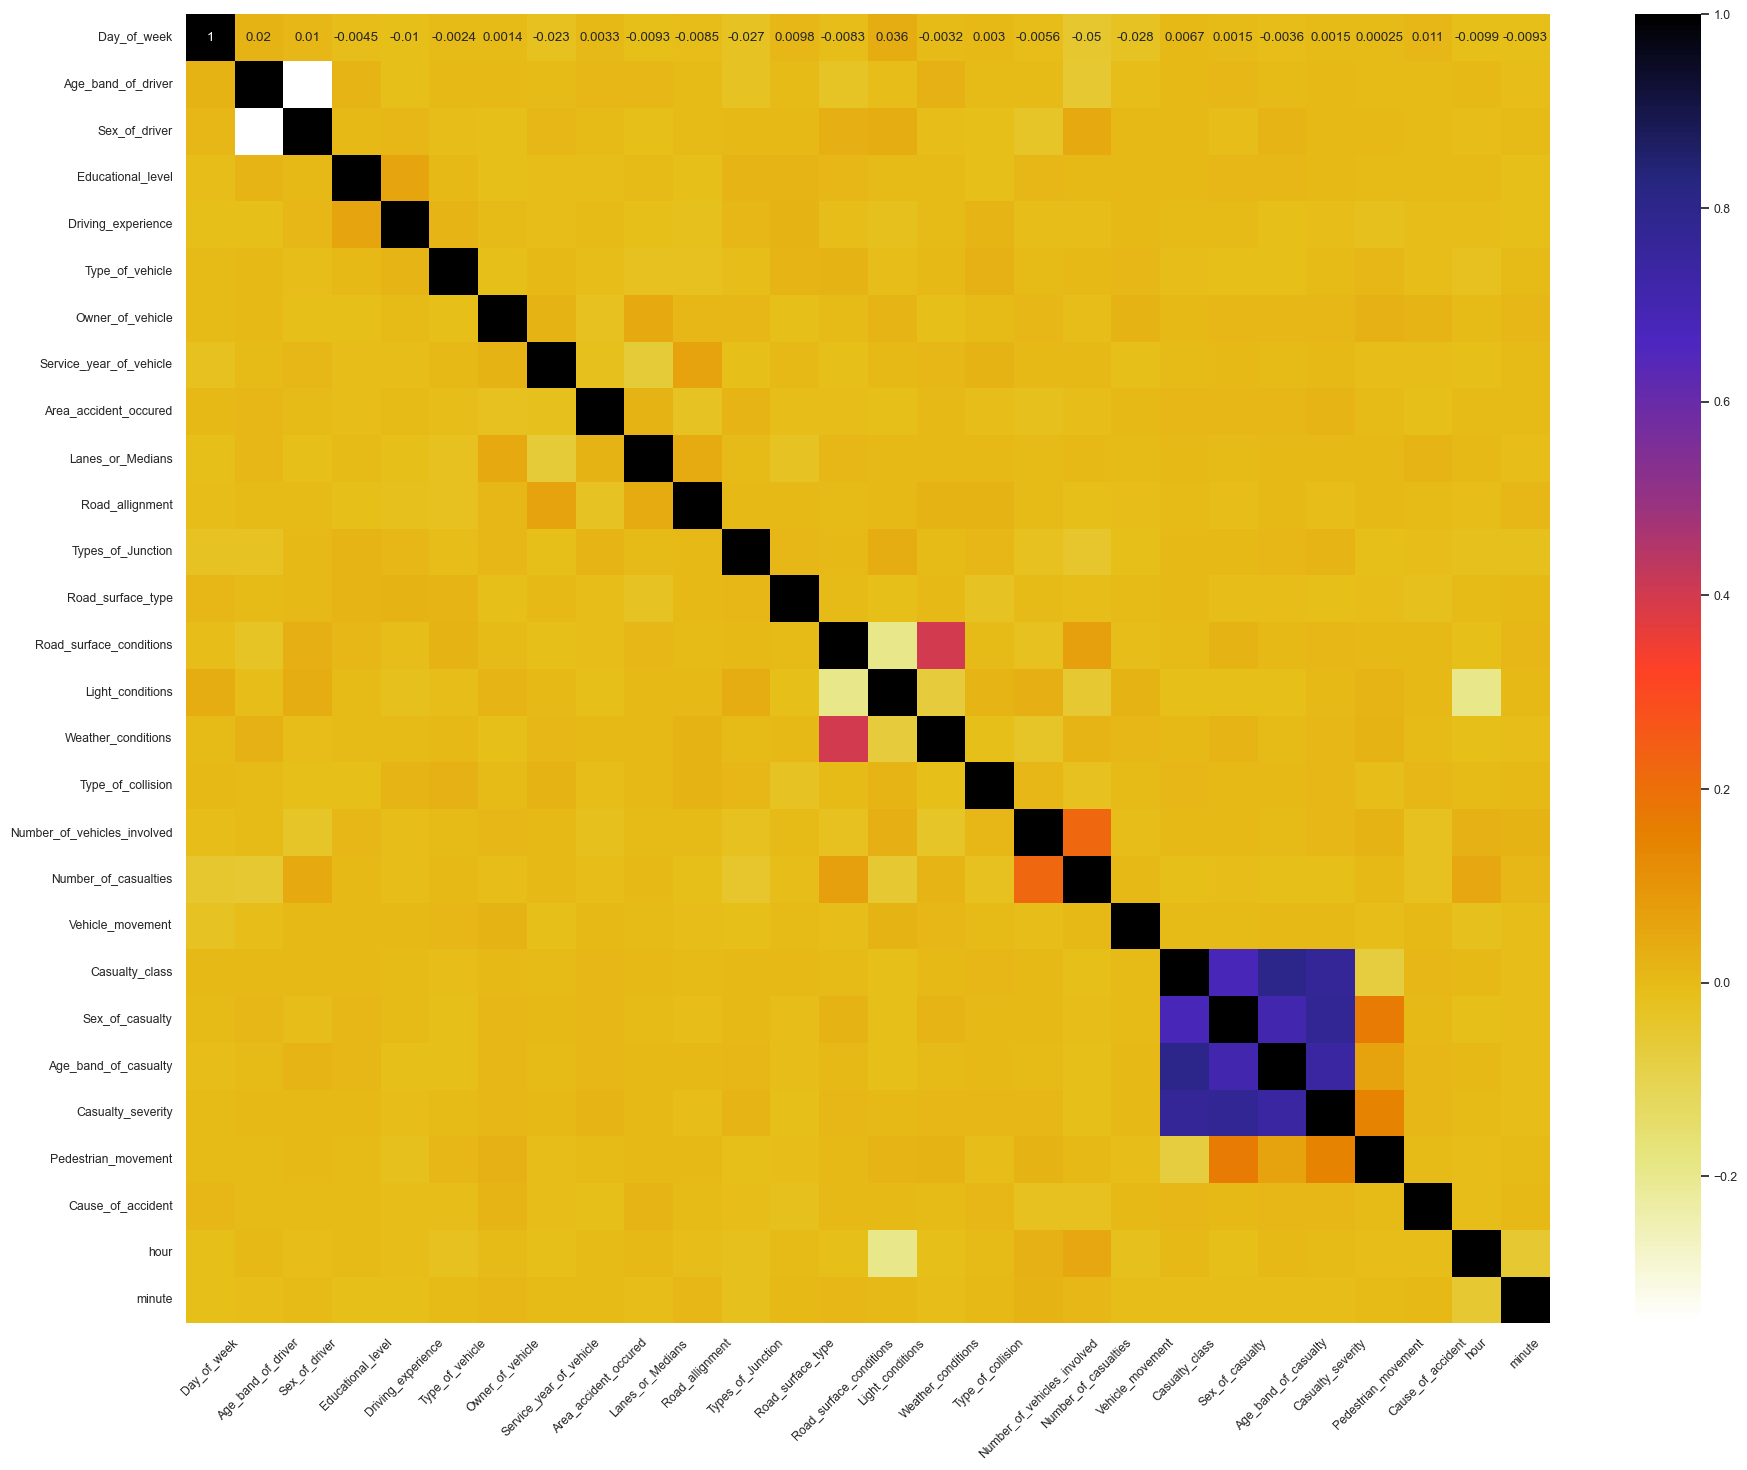

In [108]:
# Assuming 'Injury_Type' is the column with strings like 'Slight Injury'
df_numeric = df.drop(columns=['Accident_severity'])

plt.figure(figsize=(22, 17))
sns.set(font_scale=0.8)
heatmap = sns.heatmap(df_numeric.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Rotate y-axis tick labels
plt.yticks(rotation=0)

plt.show()



In [109]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,1,0,1,0,0,0,3,3,9,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,6,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,1,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,6,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,4,6,...,2,3,2,5,3,5,16,Slight Injury,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,4,1,4,3,5,5,4,...,2,3,2,5,3,5,10,Slight Injury,16,15
12312,3,4,1,1,2,0,3,5,5,2,...,4,3,2,5,3,5,10,Slight Injury,18,0
12313,3,2,1,4,2,1,3,1,5,2,...,4,0,1,1,2,5,1,Serious Injury,13,55
12314,3,0,0,4,3,5,3,1,6,4,...,4,3,2,5,3,5,5,Slight Injury,13,55


In [110]:
#splitting data into training and testing

X=df.drop('Accident_severity', axis=1)
Y=df['Accident_severity']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [111]:
X_train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour,minute
4759,6,1,1,2,0,0,3,5,7,4,...,0,1,2,0,1,2,5,0,7,20
5676,6,1,1,1,4,14,3,3,7,2,...,0,2,0,1,0,2,5,16,6,9
353,3,4,0,4,0,7,3,5,7,2,...,0,2,0,1,0,2,5,3,6,0
6223,2,1,1,4,2,9,3,3,7,4,...,0,2,0,1,0,2,5,1,4,30
456,5,3,1,2,1,0,1,2,2,2,...,5,2,0,1,1,2,5,12,11,30


In [112]:
X_train.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'hour', 'minute'],
      dtype='object')

In [113]:
X_train

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour,minute
4759,6,1,1,2,0,0,3,5,7,4,...,0,1,2,0,1,2,5,0,7,20
5676,6,1,1,1,4,14,3,3,7,2,...,0,2,0,1,0,2,5,16,6,9
353,3,4,0,4,0,7,3,5,7,2,...,0,2,0,1,0,2,5,3,6,0
6223,2,1,1,4,2,9,3,3,7,4,...,0,2,0,1,0,2,5,1,4,30
456,5,3,1,2,1,0,1,2,2,2,...,5,2,0,1,1,2,5,12,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,6,4,1,4,0,8,3,2,9,4,...,1,2,0,0,0,2,5,3,17,45
5191,6,1,1,1,1,0,3,1,2,4,...,0,2,0,1,1,2,5,0,17,17
5390,6,1,1,0,2,0,0,5,2,2,...,0,4,0,1,0,2,5,9,12,19
860,4,2,1,2,2,0,3,1,12,4,...,1,2,0,1,1,2,5,10,8,55


In [114]:
Y_train.head()

4759     Slight Injury
5676    Serious Injury
353     Serious Injury
6223     Slight Injury
456     Serious Injury
Name: Accident_severity, dtype: object

In [115]:
# upsampling using smote

counter = Counter(Y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(Y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

counter = Counter(Y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(Y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, Y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [116]:
#Y_test = ordinal_encoding(pd.DataFrame(Y_test, columns = ['Accident_severity']), pd.DataFrame(Y_test, columns = ['Accident_severity']).columns)['Accident_severity']
#Y_train = ordinal_encoding(pd.DataFrame(Y_train, columns = ['Accident_severity']), pd.DataFrame(Y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [117]:
Y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: Accident_severity, Length: 3695, dtype: object

In [118]:
Y_test = ordinal_encoding(pd.DataFrame(Y_test, columns = ['Accident_severity']), pd.DataFrame(Y_test, columns = ['Accident_severity']).columns)['Accident_severity']
Y_train = ordinal_encoding(pd.DataFrame(Y_train, columns = ['Accident_severity']), pd.DataFrame(Y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [119]:
Y_test.head()

4281     2
4010     2
1022     1
8775     2
10000    2
Name: Accident_severity, dtype: int32

In [120]:
Y_train.head()

0    2
1    1
2    1
3    2
4    1
Name: Accident_severity, dtype: int32

BUILDING A BASELINE MODEL FOR CLASSIFICATION

In [121]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)
        
    return scores,models

In [122]:
X_train.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,...,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,hour,minute
0,6,1,1,2,0,0,3,5,7,4,...,0,1,2,0,1,2,5,0,7,20
1,6,1,1,1,4,14,3,3,7,2,...,0,2,0,1,0,2,5,16,6,9
2,3,4,0,4,0,7,3,5,7,2,...,0,2,0,1,0,2,5,3,6,0
3,2,1,1,4,2,9,3,3,7,4,...,0,2,0,1,0,2,5,1,4,30
4,5,3,1,2,1,0,1,2,2,2,...,5,2,0,1,1,2,5,12,11,30


In [123]:
scores, models = modelling(X_train, Y_train, X_test, Y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.7991880920162382], 'rf': [0.7975642760487145], 'extree': [0.8146143437077131]}


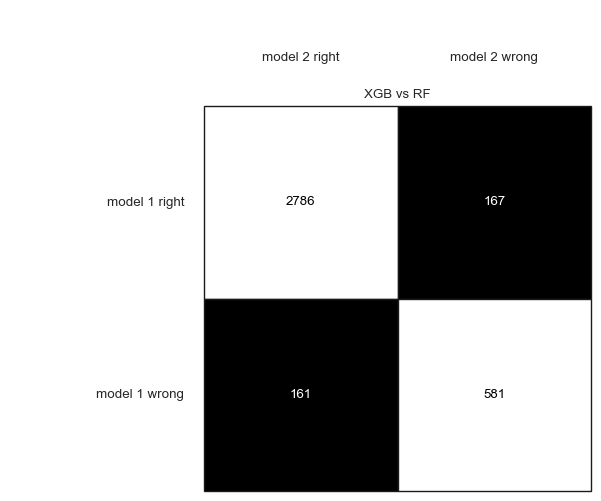

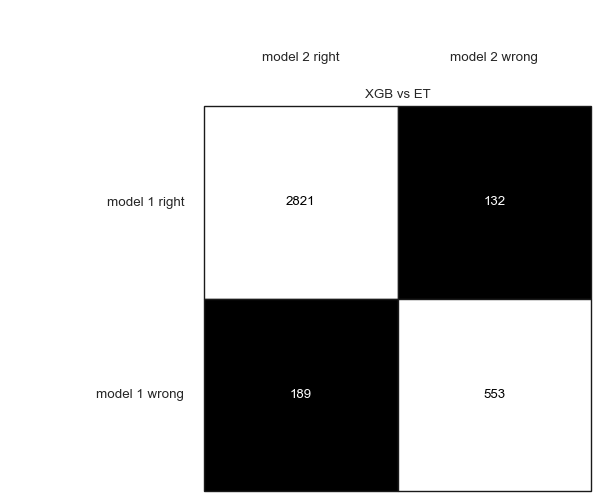

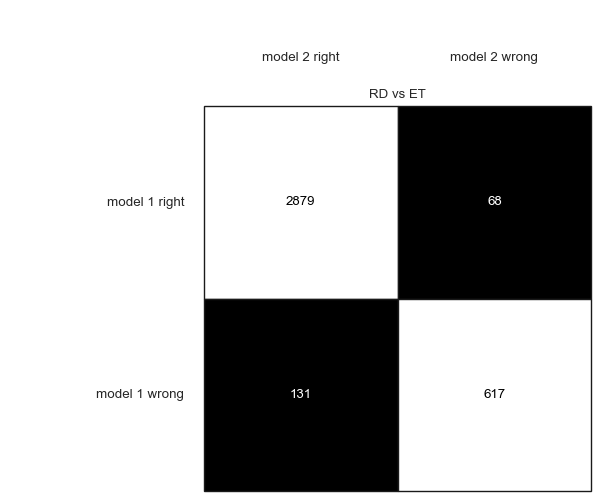

In [124]:
y_pred_xgb=models[0].predict(X_test)
y_pred_rf=models[1].predict(X_test)
y_pred_extree=models[2].predict(X_test)



tb = mcnemar_tables(Y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_extree)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("XGB vs RF")
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("XGB vs ET")
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model 2 right', 'model 2 wrong'],
                        row_labels=['model 1 right', 'model 1 wrong'])
plt.title("RD vs ET")
plt.show()


In [125]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False,text=conf_matrix,hoverinfo='text')

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_hat, average= 'weighted')
    Recall    =  recall_score(y_test, y_hat, average= 'weighted')
    F1_score  =  f1_score(y_test, y_hat, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [126]:
extree=ExtraTreesClassifier()
extree.fit(X_train, Y_train)
y_pred=extree.predict(X_test)

In [127]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
model_performance(extree, Y_test, y_pred)

C:\Users\shrir\AppData\Local\Temp\ipykernel_14104\929805232.py:1: DeprecationWarning:

`round_` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `round` instead.

c:\Users\shrir\anaconda3\envs\Visioguide\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [128]:
extree.feature_importances_

array([0.05157452, 0.05307116, 0.0131835 , 0.03486973, 0.04415433,
       0.04064268, 0.02013651, 0.03874714, 0.03678141, 0.04306076,
       0.01716995, 0.04430826, 0.01238468, 0.03512212, 0.05131919,
       0.01795889, 0.03355911, 0.05141938, 0.05189088, 0.02619857,
       0.03012195, 0.03274466, 0.03011612, 0.01961972, 0.01173772,
       0.04657007, 0.0486842 , 0.0628528 ])

<Axes: xlabel='importance', ylabel='features'>

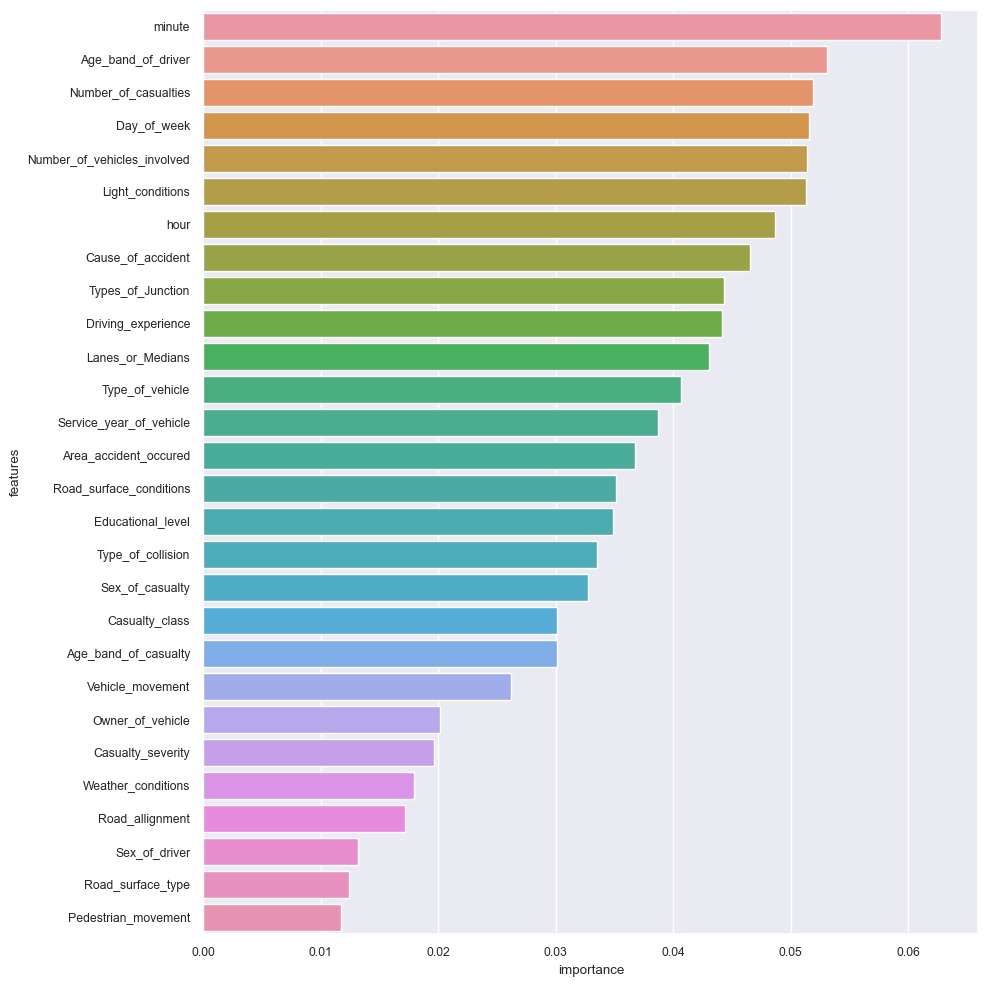

In [129]:
df_important=pd.DataFrame()
df_important['features']=X_train.columns
df_important['importance']=extree.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data=df_important.sort_values(by='importance', ascending=False), x='importance', y='features')

In [133]:
top10 = list(df_important.sort_values("importance", ascending=False)['features'].head(10).values)
top10

['minute',
 'Age_band_of_driver',
 'Number_of_casualties',
 'Day_of_week',
 'Number_of_vehicles_involved',
 'Light_conditions',
 'hour',
 'Cause_of_accident',
 'Types_of_Junction',
 'Driving_experience']

In [137]:
top10 = list(df_important.sort_values("importance", ascending=False)['features'].head(10).values)

# Remove "minute" from the list
top9 = [feature for feature in top10 if "minute" not in feature]

In [138]:
top9

['Age_band_of_driver',
 'Number_of_casualties',
 'Day_of_week',
 'Number_of_vehicles_involved',
 'Light_conditions',
 'hour',
 'Cause_of_accident',
 'Types_of_Junction',
 'Driving_experience']

In [139]:
df_top9=df[top9]
df_top9.head()

,Age_band_of_driver,Number_of_casualties,Day_of_week,Number_of_vehicles_involved,Light_conditions,hour,Cause_of_accident,Types_of_Junction,Driving_experience
0,0,1,1,1,3,17,9,1,0
1,1,1,1,1,3,17,16,1,3
2,0,1,1,1,3,17,0,1,0
3,0,1,3,1,0,1,1,7,2
4,0,1,3,1,0,1,16,7,1


In [140]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_top9, Y, test_size=0.3, random_state=42)
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

(8621, 9) (3695, 9) (8621,) (3695,)


In [141]:
extree.fit(X_train_new, y_train_new)

ExtraTreesClassifier()

In [142]:
y_pred_new = extree.predict(X_test_new)
score_new = accuracy_score(y_test_new, y_pred_new)
print("Accuracy: ", score_new)

Accuracy:  0.8454668470906631


HYPER-PARAMETER TUNING

In [144]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train_new, y=y_train_new)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train_new, y=y_train_new)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7998845259897894)

In [145]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 100)

extree_tuned.fit(X_train_new, y_train_new)

ExtraTreesClassifier(class_weight='balanced', max_depth=15)

In [146]:
print(extree_tuned.feature_importances_)

[0.10534811 0.14706975 0.14232309 0.10735603 0.04532224 0.14961736
 0.11144953 0.1034256  0.0880883 ]


In [147]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

ValueError: Length of values (9) does not match length of index (28)

In [149]:
import joblib
joblib.dump(extree_tuned, 'extree_tuned_final.joblib')

['extree_tuned_final.joblib']

In [150]:
extree_tuned=joblib.load('extree_tuned_final.joblib')

In [151]:
extree_tuned.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [154]:
extree_tuned.predict(X_test_new)

array(['Slight Injury', 'Slight Injury', 'Slight Injury', ...,
       'Slight Injury', 'Slight Injury', 'Slight Injury'], dtype=object)

In [155]:
X_train_new.head()


,Age_band_of_driver,Number_of_casualties,Day_of_week,Number_of_vehicles_involved,Light_conditions,hour,Cause_of_accident,Types_of_Junction,Driving_experience
4759,1,0,6,1,3,7,0,1,0
5676,1,0,6,1,3,6,16,1,4
353,4,0,3,1,0,6,3,0,0
6223,1,0,2,1,0,4,1,7,2
456,3,5,5,3,3,11,12,0,1


In [160]:
n=X_train_new['Number_of_casualties'].unique()
n

array([0, 5, 1, 3, 2, 4, 6, 7])

In [161]:
X_train_new.head()

,Age_band_of_driver,Number_of_casualties,Day_of_week,Number_of_vehicles_involved,Light_conditions,hour,Cause_of_accident,Types_of_Junction,Driving_experience
4759,1,0,6,1,3,7,0,1,0
5676,1,0,6,1,3,6,16,1,4
353,4,0,3,1,0,6,3,0,0
6223,1,0,2,1,0,4,1,7,2
456,3,5,5,3,3,11,12,0,1


In [164]:
p1=pd.read_csv("C:\TMLC\PROJECT 1\Dataset\RTA.csv")

In [167]:
p1['Number_of_casualties'].unique()

array([2, 1, 3, 4, 6, 5, 8, 7], dtype=int64)

In [62]:
dt=pd.read_csv("C:\TMLC\PROJECT 1\Dataset\RTA.csv")


In [83]:
name=dt['Pedestrian_movement'].unique()
print(name)

['Not a Pedestrian' "Crossing from driver's nearside"
 'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle'
 'Unknown or other'
 'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle'
 'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)'
 'Walking along in carriageway, back to traffic'
 'Walking along in carriageway, facing traffic'
 'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle']


In [89]:
dt.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [90]:
dt['Time']=pd.to_datetime(dt['Time'])

dt["Time"].dt.hour

# extracting hour and minute from timestamp
dt['hour'] = dt['Time'].dt.hour
dt['minute'] = dt['Time'].dt.minute
dt.drop('Time', axis=1, inplace=True)

C:\Users\shrir\AppData\Local\Temp\ipykernel_14104\2538096100.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [79]:
dt.drop(columns=['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [80]:
dt.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')